# <span style="color:#9B59B6"> TEMA DA CP1: Modelo de classificação de email: spam ou não</span>

Aluna: Débora Dâmaso Lopes

RM: 97836

Turma 2TSDPN

# <span style="color:#9B59B6"> 1. Sumário </span> <a class="ancora" id="sumario_1"></a>

Está é uma breve análise referente à um dataset relacionado à emails e spams, que será utilizado para a resolução do primeiro checkpoint da matéria Disruptive Architectures: IOT, IOB & Generative IA.

# <span style="color:#9B59B6"> 2. Descrição de classificação </span> <a class="ancora" id="sumario_1"></a>


Classificação refere-se à categorização dos dados fornecidos em classes.

Por exemplo:

* Dada uma imagem de um caractere escrito à mão, identificar o caractere (classificação multi-classe);

* Dada uma imagem, anotá-la com todos os objetos presentes na imagem (classificação multi-rótulo);

* Classificar um e-mail como spam ou não spam (classificação binária);

* Classificar um tumor como benigno ou maligno e assim por diante.


# <span style="color:#9B59B6">  3. Proposta de negócio </span>  

O objetivo deste estudo é classificar e-mails como spam ou não spam. Os modelos utilizados foram Bayes, KNN e SVM.


## <span style="color:#9B59B6"> 4. Etapa de Preparação

#### 4.1 Datasets utilizados:
O Dataset <a href="https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset/">Spam or Not Spam Dataset</a> utilizado foi retirado do site Kaggle. Se trata de um Dataset com o índice de usabilidade de 8.82 calculado pelo Kaggle.


#### 4.2 Organização dos Dados:

* O arquivo base do estudo se chama <i>spam_or_not_spam.csv</i> e foi extraído do dataset para dentro desta <a href="https://drive.google.com/drive/folders/1LFdEvz4bDr4C36VjVpMxZDK1dQpvnr_X?usp=sharing">pasta do google drive</a>.

* O <b>vídeo de apresentação</b> do projeto foi enviado para o youtube, é possível encontrar o link dentro do arquivo <i>links.txt</i> na mesma pasta do google drive mencionada acima.


## <span style="color:#9B59B6"> 5. ANÁLISE EXPLORATÓRIA

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Carregar o conjunto de dados
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CP-Email/spam_or_not_spam.csv")

In [ ]:
print(data.head(10))

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
5   i just had to jump in here as carbonara is on...      0
6  the scotsman NUMBER august NUMBER playboy want...      0
7  martin adamson wrote isn t it just basically a...      0
8  the scotsman thu NUMBER aug NUMBER meaningful ...      0
9  i have been trying to research via sa mirrors ...      0


In [ ]:
# Verificar o tamanho do conjunto de dados (número de linhas e colunas)
print("Tamanho do dataset:", data.shape)

Tamanho do dataset: (5331, 2)


<b>Tipos de dados:</b>

In [ ]:
# Verificar os tipos de dados de cada coluna
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
email    object
label     int64
dtype: object


<b>Procurar por valores nulos</b>

In [ ]:
# Verificar se há valores ausentes
print("Missing values:")
print(data.isnull().sum())

Missing values:
email    2
label    0
dtype: int64


<b>Removendo valores nulos</b>

In [ ]:
# Remover linhas com valores NaN na coluna 'email'
data.dropna(subset=['email'], inplace=True)

# Reexecutar a análise do comprimento do e-mail
data['email_length'] = data['email'].apply(len)
print("Average email length:")
print(data['email_length'].mean())


Average email length:
1394.4276599737286


<b>Distribuição das classes (labels)</b>

In [ ]:
print("Distribuição das classes:")
print(data['label'].value_counts())

Distribuição das classes:
label
0    4331
1     998
Name: count, dtype: int64


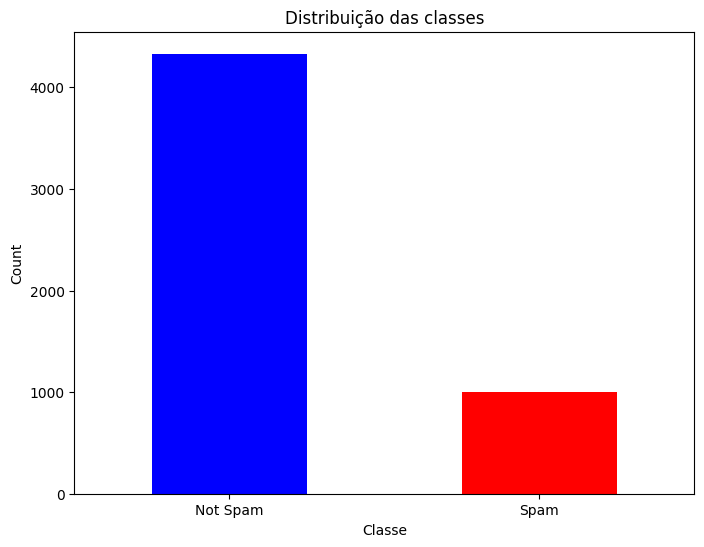

In [ ]:
# Visualização da distribuição das classes
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribuição das classes')
plt.xlabel('Classe')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

<b> Resumindo: </b>

* Estrutura do conjunto de dados:
O conjunto de dados possui duas colunas: "email" e "label". A coluna "email" contém o texto do e-mail, enquanto a coluna "label" contém a classe associada a cada e-mail (0 para não spam e 1 para spam).

* Sobre os dados:
O conjunto de dados tem 5331 exemplos e 2 características.
A coluna "email" é do tipo 'object' (texto), e a coluna "label" é do tipo 'int64' (inteiro).

* Valores ausentes:
Há 2 valores ausentes na coluna "email". Estes valores já foram tratados agora mesmo.

* Distribuição das classes:
A classe 0 (não spam) tem 4331 exemplos, enquanto a classe 1 (spam) tem 1000 exemplos.

<b>Esta é uma distribuição desigual, com muito mais exemplos de não spam do que de spam.</b>

In [ ]:
# Verificar os tipos de dados únicos na coluna "email"
print("Unique data types in 'email' column:")
print(data['email'].apply(type).unique())

# Identificar os valores específicos que são do tipo float
float_emails = data[data['email'].apply(lambda x: isinstance(x, float))]['email']
print("Float emails:")
print(float_emails)


Unique data types in 'email' column:
[<class 'str'>]
Float emails:
Series([], Name: email, dtype: object)


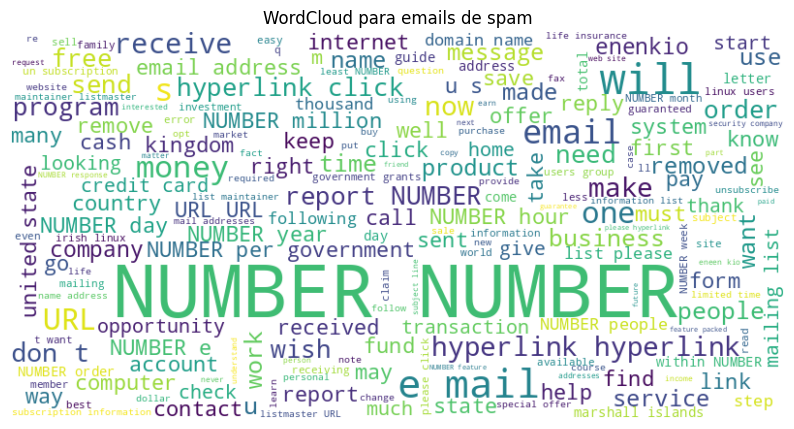

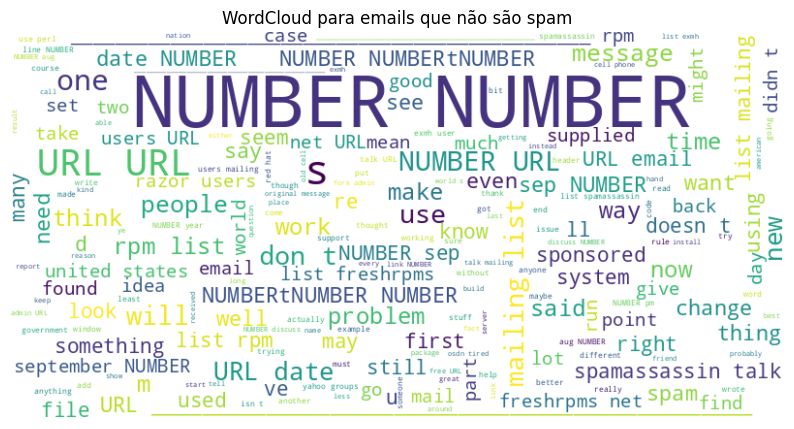

In [ ]:
# Análise de palavras mais frequentes (opcional)
spam_emails = data[data['label'] == 1]['email']
not_spam_emails = data[data['label'] == 0]['email']

# Criar WordCloud para spam
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('WordCloud para emails de spam')
plt.axis('off')
plt.show()
print("") #só para pular uma linha
# Criar WordCloud para não spam
not_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(not_spam_emails))
plt.figure(figsize=(10, 6))
plt.imshow(not_spam_wordcloud, interpolation='bilinear')
plt.title('WordCloud para emails que não são spam')
plt.axis('off')
plt.show()


In [ ]:
# Comparar o comprimento médio dos e-mails por classe
avg_length_spam = data[data['label'] == 1]['email_length'].mean()
avg_length_not_spam = data[data['label'] == 0]['email_length'].mean()

print("Comprimento médio de emails de spam:", avg_length_spam)
print("Comprimento médio de emails que não são spam:", avg_length_not_spam)

Comprimento médio de emails de spam: 2308.0581162324647
Comprimento médio de emails que não são spam: 1183.8981759408912


<b>NOTA:</b>

As médias de comprimento dos e-mails de spam e não spam são 2308.06 e 1183.90, respectivamente. Podemos observar uma diferença considerável entre esses valores, o que pode indicar uma característica distintiva entre os dois tipos de e-mails.

E-mails de spam tendem a ser significativamente mais longos em média do que e-mails legítimos. Isso pode ser atribuído a várias razões, como a inclusão de grandes quantidades de texto ou HTML para fins de marketing, tentativas de disfarçar o conteúdo malicioso com informações adicionais, ou a presença de mais redirecionamentos de URL e links em e-mails de spam.

Essa diferença de comprimento médio pode ser uma característica útil para a classificação de e-mails como spam ou não spam. Por exemplo, um modelo de aprendizado de máquina pode aprender a associar e-mails mais longos com spam, enquanto e-mails mais curtos são mais propensos a serem legítimos. Essa observação pode influenciar a seleção de características e a construção de modelos mais precisos para a detecção de spam.

<b>Analise de palavras chaves mais comuns em cada tipo de email</b>

In [ ]:
from collections import Counter
import string

# Função para tokenizar o texto e remover pontuações
def tokenize_and_remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text.lower().split()

# Tokenizar e contar palavras em e-mails de spam
spam_words = ' '.join(spam_emails)
spam_word_list = tokenize_and_remove_punctuation(spam_words)
spam_word_counts = Counter(spam_word_list)

# Tokenizar e contar palavras em e-mails de não spam
not_spam_words = ' '.join(not_spam_emails)
not_spam_word_list = tokenize_and_remove_punctuation(not_spam_words)
not_spam_word_counts = Counter(not_spam_word_list)

# Exibir as 10 palavras mais comuns em e-mails de spam e não spam
print("Top 10 palavras mais comuns em e-mails de spam:")
print(spam_word_counts.most_common(10))

print("\nTop 10 palavras mais comuns em e-mails de não spam:")
print(not_spam_word_counts.most_common(10))


Top 10 palavras mais comuns em e-mails de spam:
[('number', 14596), ('the', 11511), ('to', 9765), ('and', 7423), ('of', 7125), ('you', 6991), ('a', 4988), ('in', 4280), ('for', 4081), ('your', 3775)]

Top 10 palavras mais comuns em e-mails de não spam:
[('number', 48334), ('the', 37160), ('to', 22110), ('and', 17436), ('of', 17255), ('a', 17130), ('url', 13129), ('i', 12910), ('in', 11992), ('is', 10455)]


<b>Conclusões</b>:

Palavra 'number': A palavra 'number' é a mais comum em ambos os tipos de e-mails. Isso pode ser devido à presença de números em e-mails, como datas, horários, quantidades, etc.

Palavras comuns em inglês: Muitas das palavras mais comuns são stopwords comuns em inglês, como 'the', 'to', 'and', 'of', 'a', 'in', etc. Essas palavras são frequentemente encontradas em texto em geral e podem não fornecer informações distintivas para a classificação de spam.

## <span style="color:#9B59B6"> 6. PRÉ-PROCESSAMENTO DOS DADOS:

<b>Código que remove as pontuações dos textos dos e-mails e cria uma nova coluna chamada "email_processed" no DataFrame com os e-mails processados:</b>

In [ ]:
import string

# Função para remover pontuações
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Aplicar a função de remoção de pontuações aos textos dos e-mails
data['email_processed'] = data['email'].apply(lambda x: remove_punctuation(str(x)))

# Exibir os primeiros e-mails processados
print("Exemplo de e-mail após remoção de pontuações:")
print(data['email_processed'].head())


Exemplo de e-mail após remoção de pontuações:
0     date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1    martin a posted tassos papadopoulos the greek ...
2    man threatens explosion in moscow thursday aug...
3    klez the virus that won t die already the most...
4     in adding cream to spaghetti carbonara which ...
Name: email_processed, dtype: object


<b>Agora, vamos prosseguir com a etapa de tokenização, que envolve dividir o texto em palavras individuais (tokens).</b>

In [ ]:
# Função para tokenização
def tokenize(text):
    return text.split()

# Aplicar a função de tokenização aos textos dos e-mails processados
data['email_processed'] = data['email_processed'].apply(tokenize)

# Exibir os primeiros e-mails processados
print("Exemplo de e-mail após tokenização:")
print(data['email_processed'].head())


Exemplo de e-mail após tokenização:
0    [date, wed, NUMBER, aug, NUMBER, NUMBER, NUMBE...
1    [martin, a, posted, tassos, papadopoulos, the,...
2    [man, threatens, explosion, in, moscow, thursd...
3    [klez, the, virus, that, won, t, die, already,...
4    [in, adding, cream, to, spaghetti, carbonara, ...
Name: email_processed, dtype: object


<b>Agora vamos prosseguir com a etapa de remoção de stopwords. Stopwords são palavras comuns que geralmente não contribuem para o significado do texto e podem ser removidas com segurança.</b>

In [ ]:
import nltk
from nltk.corpus import stopwords

# Baixar stopwords
nltk.download('stopwords')

# Obter lista de stopwords em inglês
stop_words = set(stopwords.words('english'))

# Função para remover stopwords
def remove_stopwords(text):
    return [word for word in text if word.lower() not in stop_words]

# Aplicar a função de remoção de stopwords aos textos dos e-mails processados
data['email_processed'] = data['email_processed'].apply(remove_stopwords)

# Exibir os primeiros e-mails processados
print("Exemplo de e-mail após remoção de stopwords:")
print(data['email_processed'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exemplo de e-mail após remoção de stopwords:
0    [date, wed, NUMBER, aug, NUMBER, NUMBER, NUMBE...
1    [martin, posted, tassos, papadopoulos, greek, ...
2    [man, threatens, explosion, moscow, thursday, ...
3    [klez, virus, die, already, prolific, virus, e...
4    [adding, cream, spaghetti, carbonara, effect, ...
Name: email_processed, dtype: object


<b> Agora podemos prosseguir com a etapa de normalização de texto, que envolve a conversão de todas as palavras para minúsculas.</b>

In [ ]:
# Função para normalização de texto
def normalize_text(text):
    return [word.lower() for word in text]

# Aplicar a função de normalização de texto aos textos dos e-mails processados
data['email_processed'] = data['email_processed'].apply(normalize_text)

# Exibir os primeiros e-mails processados
print("Exemplo de e-mail após normalização de texto:")
print(data['email_processed'].head())


Exemplo de e-mail após normalização de texto:
0    [date, wed, number, aug, number, number, numbe...
1    [martin, posted, tassos, papadopoulos, greek, ...
2    [man, threatens, explosion, moscow, thursday, ...
3    [klez, virus, die, already, prolific, virus, e...
4    [adding, cream, spaghetti, carbonara, effect, ...
Name: email_processed, dtype: object


<b> Vamos agora prosseguir com a etapa final de pré-processamento: stemming ou lematização. </b>

 Estas técnicas são usadas para reduzir as palavras à sua forma raiz, o que pode ajudar a reduzir a dimensionalidade do vocabulário e melhorar a generalização do modelo. Vou usar o stemming neste caso.

In [ ]:
from nltk.stem import PorterStemmer

# Inicializar o stemmer
stemmer = PorterStemmer()

# Função para aplicar stemming
def apply_stemming(text):
    return [stemmer.stem(word) for word in text]

# Aplicar a função de stemming aos textos dos e-mails processados
data['email_processed'] = data['email_processed'].apply(apply_stemming)

# Exibir os primeiros e-mails processados
print("Exemplo de e-mail após aplicação de stemming:")
print(data['email_processed'].head())


Exemplo de e-mail após aplicação de stemming:
0    [date, wed, number, aug, number, number, numbe...
1    [martin, post, tasso, papadopoulo, greek, scul...
2    [man, threaten, explos, moscow, thursday, augu...
3    [klez, viru, die, alreadi, prolif, viru, ever,...
4    [ad, cream, spaghetti, carbonara, effect, past...
Name: email_processed, dtype: object


<b>Agora, vamos consolidar todos os tokens de palavras processados de volta em textos únicos para cada e-mail.</b>

In [ ]:
# Função para unir os tokens de palavras de volta em texto único
def join_tokens(tokens):
    return ' '.join(tokens)

# Aplicar a função de união aos textos dos e-mails processados
data['email_processed'] = data['email_processed'].apply(join_tokens)

# Exibir os primeiros e-mails processados
print("Exemplo de e-mail após aplicação de stemming:")
print(data['email_processed'].head())


Exemplo de e-mail após aplicação de stemming:
0    date wed number aug number number number numbe...
1    martin post tasso papadopoulo greek sculptor b...
2    man threaten explos moscow thursday august num...
3    klez viru die alreadi prolif viru ever klez co...
4    ad cream spaghetti carbonara effect pasta make...
Name: email_processed, dtype: object


## <span style="color:#9B59B6"> 7. DESENVOLVIMENTO DO MODELO

#### 7.1 TREINANDO O MODELO:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

<b>Dados de treino e teste</b>

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(data['email_processed'], data['label'], test_size=0.2, random_state=42)

<b>O modelo bag-of-words (BOW) é uma representação que transforma texto arbitrário em vetores de comprimento fixo, contando quantas vezes cada palavra aparece. Este processo é muitas vezes referido como vetorização</b>

Exemplo:
the cat sat: [1, 1, 1, 0, 0, 0]
the cat sat in the hat: [2, 1, 1, 1, 1, 0]
the cat with the hat: [2, 1, 0, 0, 1, 1]

Se quiser se aprofundar no assunto <a href="https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971">clique aqui</a> para acessar um artigo online sobre bag-of-words :)

In [ ]:
# Vetorizar os textos dos e-mails usando Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

<b>Treinando 3 modelos diferentes: Naive Bayes, KNN e SVM</b>

In [ ]:
# Inicializar e treinar o modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)


MultinomialNB()

In [ ]:
# Inicializar e treinar o modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_bow, y_train)

KNeighborsClassifier()

In [ ]:
# Inicializar e treinar o modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_bow, y_train)

SVC(kernel='linear')

#### 7.2 PREVISÕES E DESEMPENHO DOS MODELOS:

<b>Previsões</b>

In [ ]:
# Fazer previsões no conjunto de teste usando Naive Bayes
nb_predictions = nb_model.predict(X_test_bow)

In [ ]:
# Fazer previsões no conjunto de teste usando KNN
knn_predictions = knn_model.predict(X_test_bow)

In [ ]:
# Fazer previsões no conjunto de teste usando SVM
svm_predictions = svm_model.predict(X_test_bow)

<b>Desempenho dos modelos</b>

In [ ]:
# Avaliar o desempenho do modelo Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Acurácia do modelo Naive Bayes:", nb_accuracy)
print("\nRelatório de classificação para Naive Bayes:")
print(classification_report(y_test, nb_predictions))

# Avaliar o desempenho do modelo KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("\nAcurácia do modelo KNN:", knn_accuracy)
print("\nRelatório de classificação para KNN:")
print(classification_report(y_test, knn_predictions))

# Avaliar o desempenho do modelo SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Acurácia do modelo SVM:", svm_accuracy)
print("\nRelatório de classificação para SVM:")
print(classification_report(y_test, svm_predictions))


Acurácia do modelo Naive Bayes: 0.99906191369606

Relatório de classificação para Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       861
           1       1.00      1.00      1.00       205

    accuracy                           1.00      1066
   macro avg       1.00      1.00      1.00      1066
weighted avg       1.00      1.00      1.00      1066


Acurácia do modelo KNN: 0.9136960600375235

Relatório de classificação para KNN:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       861
           1       0.76      0.81      0.78       205

    accuracy                           0.91      1066
   macro avg       0.86      0.88      0.87      1066
weighted avg       0.92      0.91      0.91      1066

Acurácia do modelo SVM: 0.9953095684803002

Relatório de classificação para SVM:
              precision    recall  f1-score   support

           0       1.00      1.00

#### 7.3 ANALISES E RESULTADOS SOBRE O MODELO

<b>Acurácia</b>

Os três modelos representam uma boa acurácia, sendo 99,9% (Naive), 99,5% (SVM) e por último o KNN com 91,3% de acurácia.

<b> Mais análises</b>

* Agora vou escolher um destes modelos para estudar mais a fundo, sendo este o SVM, o segundo de maior acurácia. O modelo SVM foi escolhido por ser um dos dois modelos recomendados pelo professor (SVM ou KNN):

A matriz de confusão é uma tabela que mostra o desempenho de um modelo de classificação em termos de classes verdadeiras e classes previstas. Cada célula da matriz representa o número de instâncias de cada classe que foram classificadas corretamente ou incorretamente pelo modelo.

Com base nesses elementos, podemos calcular várias métricas de avaliação do modelo, como precisão, recall, F1-score e acurácia.

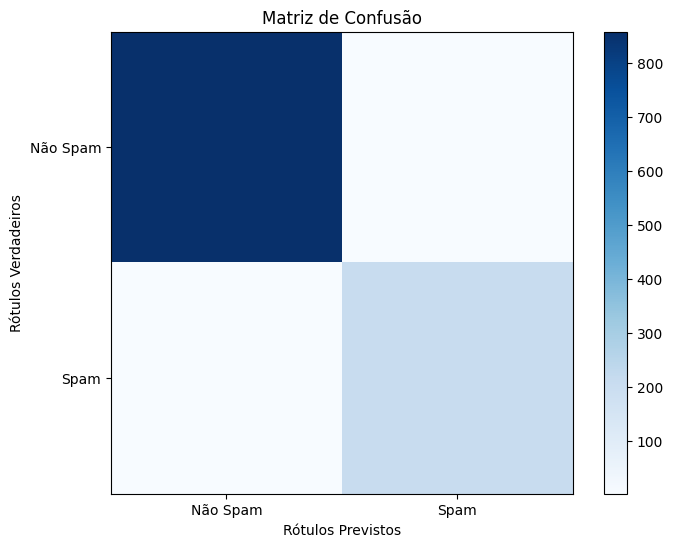

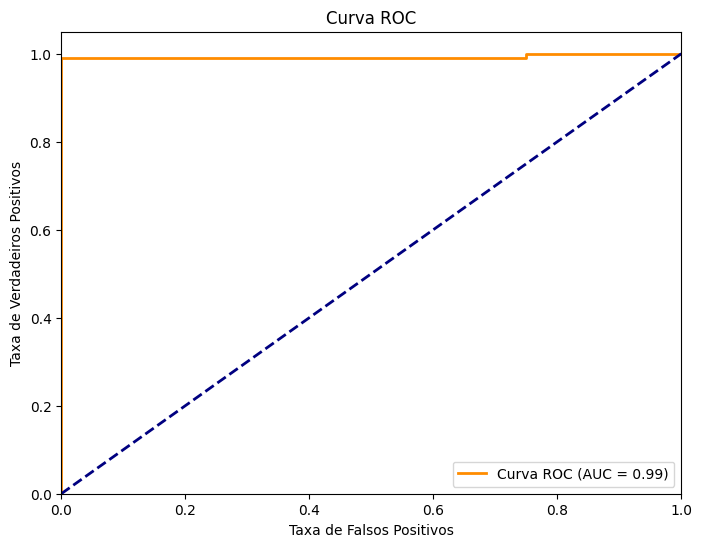

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.xticks([0, 1], ['Não Spam', 'Spam'])
plt.yticks([0, 1], ['Não Spam', 'Spam'])
plt.show()

# Calcular a curva ROC e a AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test_bow))
roc_auc = auc(fpr, tpr)

# Exibir a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular métricas da matriz de confusão
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Calcular a AUC-ROC
auc_roc_text = "AUC-ROC: %.2f" % roc_auc

# Formatando os resultados para exibição textual
text_result = f"""
Métricas da Matriz de Confusão:
- Precisão: {precision:.2f}
- Recall: {recall:.2f}
- F1-score: {f1:.2f}

{auc_roc_text}
"""

# Exibir os resultados
print(text_result)



Métricas da Matriz de Confusão:
- Precisão: 0.99
- Recall: 0.99
- F1-score: 0.99

AUC-ROC: 0.99



<b>Resultado final:</b>

 O modelo SVM apresenta um desempenho muito bom na classificação dos e-mails como spam ou não spam. Tanto a <b>precisão quanto o recall são altos</b>, indicando que o modelo faz poucos erros de classificação e é capaz de recuperar a maioria dos verdadeiros positivos. Além disso, a AUC-ROC de 0.99 indica uma excelente capacidade de separação entre as classes positivas e negativas.

#### 7.4 REALIZANDO UMA PREVISÃO ALEATÓRIA

In [ ]:
import random

# Selecionar um exemplo aleatório do conjunto de teste
random_index = random.randint(0, len(X_test)-1)
random_email = X_test.iloc[random_index]
random_label = y_test.iloc[random_index]

# Fazer a previsão usando o modelo SVM
prediction = svm_model.predict(vectorizer.transform([random_email]))[0]

# Exibir o exemplo de e-mail e o resultado da previsão
print("Exemplo de e-mail:")
print(random_email)
print("\nRótulo real:", random_label)
print("Previsão:", prediction)


Exemplo de e-mail:
upon time alvi wrote last part use rpmbuild rebuild without avifil transcod number number number frnumber src rpm afnumberdecor cpp number waveformatex use type defin type afnumberdecor cpp number pars error afnumb relat avifilenumb support normal number number number frnumber build transcod default use avifil use avifilenumb forc recompil old avifil instal mayb check configur line run begin rebuild process see includ without avifilenumb option matthia clean custom red hat linux rpm packag url red hat linux releas number number valhalla run linux kernel number number number numberacpi load number number number number number number rpm list mail list rpm list freshrpm net url

Rótulo real: 0
Previsão: 0


<b> Conclusão sobre a previsão</b>

A previsão para este exemplo de e-mail é 0, o que indica que foi classificado como não spam. O rótulo real também é 0, o que significa que este exemplo de e-mail é de fato não spam. O modelo fez a previsão corretamente!